Source of data can be obtained [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) - provided by John Hopkins University.

# UPDATE: U.S. time series data no longer being updated as of 2020-03-23 per this GitHub [issue](https://github.com/CSSEGISandData/COVID-19/issues/1534)

### Unfortunately, JHU didn't start to track confirmed cases as a function of time until March 10, 2020

In [68]:
%matplotlib inline
from datetime import date
from datetime import timedelta
import hvplot.pandas
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns
pd.options.display.max_rows=5000
pd.options.display.max_columns=1000

In [2]:
df = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
df = df.fillna({'Province/State': ''})

In [4]:
df_us = df[(df['Country/Region'] == 'US') & (~df['Province/State'].str.contains(','))]

In [5]:
df_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,572,643,904,1076,1014,1376,1524,1793,1996,1996.0
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,525,732,967,1706,2495,5365,8310,11710,15793,15793.0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,340,426,557,698,751,952,1177,1364,1642,1642.0
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,138,164,197,218,218,328,413,525,646,646.0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,47,47,47,47,49,49,49,49.0
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,21,21,20,21,21,22,23,23,30,30.0
104,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,66,99,121,146,199,287,420,507,600,600.0
105,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,101,131,160,160,184,277,363,390,476,476.0
106,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,76,115,155,216,314,417,563,659,830,830.0
107,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,69,98,178,267,267,742,890,1327,1914,1914.0


In [6]:
df = df_us.drop(columns=['Country/Region', 'Lat', 'Long'])

In [7]:
df_final = df.transpose()
df_final = df_final.rename(columns=df_final.iloc[0]).drop(df_final.index[0])

In [8]:
df_final.tail()

,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,...,North Dakota,South Dakota,West Virginia,Wyoming,Alabama,Puerto Rico,Guam,Virgin Islands,United States Virgin Islands,US
3/19/20,1376,5365,952,328,47,22,287,277,417,742,...,18,11,2,18,78,5,12,3,0,0
3/20/20,1524,8310,1177,413,49,23,420,363,563,890,...,19,14,7,19,83,14,14,3,0,0
3/21/20,1793,11710,1364,525,49,23,507,390,659,1327,...,28,14,8,23,131,21,15,3,0,0
3/22/20,1996,15793,1642,646,49,30,600,476,830,1914,...,28,21,12,24,138,23,27,3,0,0
3/23/20,1996,15793,1642,646,49,30,600,476,830,1914,...,28,21,12,24,138,23,27,NaN,6,1


In [9]:
df_final = df_final.drop(columns=['Diamond Princess', 'Grand Princess'])

In [10]:
df_final.iloc[:, range(10)].tail()

,Washington,New York,California,Massachusetts,Georgia,Colorado,Florida,New Jersey,Oregon,Texas
3/19/20,1376,5365,952,328,287,277,417,742,88,260
3/20/20,1524,8310,1177,413,420,363,563,890,114,394
3/21/20,1793,11710,1364,525,507,390,659,1327,114,581
3/22/20,1996,15793,1642,646,600,476,830,1914,161,627
3/23/20,1996,15793,1642,646,600,476,830,1914,161,627


#### Convert dataframe index into datetime data type for easier filtering

In [11]:
df_final.index = [datetime.strptime(date, '%m/%d/%y') for date in df_final.index]

#### We can see that JHU did not start tracking incidents until March 10, 2020

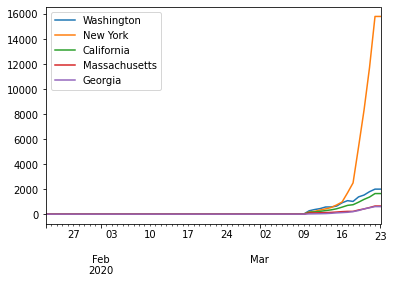

In [12]:
df_final.iloc[:, range(5)].plot();

#### So we will start our chart with March 10, 2020

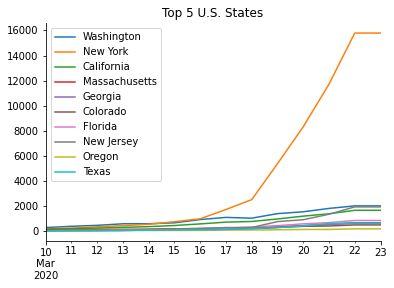

In [13]:
# Chart Top 5 U.S. states
df_final['2020-03-10':].iloc[:, range(10)].plot();
plt.title("Top 5 U.S. States")
sns.despine()

In [14]:
df_final['2020-03-10':].iloc[:, range(10)].hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Ohio's counts

In [15]:
df_final['2020-03-10':].loc[:, 'Ohio']

2020-03-10      3
2020-03-11      4
2020-03-12      5
2020-03-13     13
2020-03-14     26
2020-03-15     37
2020-03-16     50
2020-03-17     67
2020-03-18     86
2020-03-19    119
2020-03-20    173
2020-03-21    248
2020-03-22    355
2020-03-23    355
Name: Ohio, dtype: object

In [16]:
df_final['2020-03-10':].loc[:, 'Ohio'].hvplot()

:Curve   [index]   (Ohio)

In [17]:
df_final['2020-03-10':].loc[:, 'New York']

2020-03-10      173
2020-03-11      220
2020-03-12      328
2020-03-13      421
2020-03-14      525
2020-03-15      732
2020-03-16      967
2020-03-17     1706
2020-03-18     2495
2020-03-19     5365
2020-03-20     8310
2020-03-21    11710
2020-03-22    15793
2020-03-23    15793
Name: New York, dtype: object

In [18]:
df_final['2020-03-10':].loc[:, 'New York'].hvplot()

:Curve   [index]   (New York)

### As we can see from above, JHU no longer updates the data after 3/2/2020 :-(

### Alternate [Source](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/) for Time Series Data!

In [29]:
url = 'https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv'

In [39]:
df = pd.read_csv(url)

HTTPError: HTTP Error 403: Forbidden

Since we're getting 403 error, may need to "look" like a browser by sending in a user-agent along with our headers.  So we'll use the ```requests``` and ```StringIO``` libraries for this.

In [40]:
import io
import requests

In [41]:
headers = {
    "User-Agent": "My python app, contact me at pybokeh@protonmail.com"
}

In [42]:
r = requests.get(url, headers=headers)

In [52]:
df = pd.read_csv(io.StringIO(r.text))

In [53]:
df.head()

,ï»¿countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,3,4
3,1015,Calhoun County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2
4,1017,Chambers County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,5


#### Let's drop unneeded columns

In [54]:
df.drop(labels=['ï»¿countyFIPS', 'County Name', 'stateFIPS'], axis='columns', inplace=True)

In [55]:
df.head()

,State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
0,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,3,4
3,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2
4,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,5


#### Now let's aggregate or sum up the counts by State

In [73]:
df.groupby('State').agg('sum')

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,6,6,10,16,20,23,37,42
AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,11,22,29,39,51,78,106,131,167,196,242
AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,8,12,16,22,28,37,62,100,118,165,197,233
AZ,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,6,6,10,10,10,12,12,18,20,27,44,63,103,152,234,326
CA,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,12,21,25,35,51,59,102,116,167,179,263,266,305,372,480,588,741,892,1065,1289,1524,1826,2253,2642
CO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,7,14,18,24,49,77,101,131,160,183,183,277,362,475,591,720,912
CT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,8,20,26,41,68,96,159,194,223,327,415,618
DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,10,10,10,16,17,22,31,39,71,77,98,116,137,183
DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,6,7,8,17,26,30,39,45,56,87,104


#### The data above is sorted by state code, but let's sort by cumulative qty on the last or latest date by descending order

First we need to programmatically calculate the latest date which will be one day behind current date.  [strftime.org](https://strftime.org/)

In [71]:
latest_date = (date.today() + timedelta(days=-1)).strftime("%-m/%-d/%Y")
latest_date

'3/24/2020'

#### Now we can pass the ```latest_date``` variable to our ```sort_values()``` method:

In [72]:
df.groupby('State').agg('sum').sort_values(by=latest_date, ascending=False)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,11,23,36,76,106,150,173,226,325,421,613,729,950,1653,2382,5637,7105,12208,15223,20877,26399
NJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,5,15,23,23,29,56,72,98,176,267,417,742,890,1327,1914,2851,3675
CA,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,12,21,25,35,51,59,102,116,167,179,263,266,305,372,480,588,741,892,1065,1289,1524,1826,2253,2642
WA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,11,18,27,39,70,78,102,122,162,265,365,457,568,642,769,906,1006,1187,1376,1524,1790,1996,2221,2469
MI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,12,34,42,82,54,65,80,334,549,787,1035,1328,1791
IL,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4,4,4,5,5,6,7,13,19,24,32,46,63,164,104,159,287,421,584,752,1049,1285,1603
FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,6,9,14,25,49,58,64,96,136,167,216,328,432,652,762,1005,1227,1412
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,22,28,54,85,103,136,196,280,391,535,762,837,1170,1394
MA,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,6,6,22,41,92,95,109,125,139,163,197,218,256,328,416,525,646,777,1159


#### To use plotting libraries, we probably should transpose the dataframe

In [74]:
df.groupby('State').agg('sum').sort_values(by=latest_date, ascending=False).transpose()

State,NY,NJ,CA,WA,MI,IL,FL,LA,MA,GA,CO,TX,PA,TN,CT,OH,WI,NC,IN,MD,SC,AZ,MS,UT,VA,NV,MN,MO,AL,AR,OR,DC,KY,IA,ME,NH,OK,RI,DE,NM,VT,KS,HI,ID,NE,MT,AK,WV,WY,ND,SD
1/22/2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/2020,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/27/2020,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/28/2020,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/29/2020,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/30/2020,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/31/2020,0,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Now that we have our dataframe in a final format, let's save it into a variable

In [80]:
df_final = df.groupby('State').agg('sum').sort_values(by=latest_date, ascending=False).transpose()

#### To take advantage of pandas' time series capabilities, it is best that we convert the index values to datetime values

In [81]:
df_final.index = pd.to_datetime(df_final.index)

In [82]:
df_final.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

#### Now that our index values are of type ```datetime```, we can leverage simple filtering API

In [86]:
df_final['2020-02-21':]

State,NY,NJ,CA,WA,MI,IL,FL,LA,MA,GA,CO,TX,PA,TN,CT,OH,WI,NC,IN,MD,SC,AZ,MS,UT,VA,NV,MN,MO,AL,AR,OR,DC,KY,IA,ME,NH,OK,RI,DE,NM,VT,KS,HI,ID,NE,MT,AK,WV,WY,ND,SD
2020-02-21,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-22,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-23,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-24,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-25,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-26,0,0,10,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-27,0,0,11,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-28,0,0,11,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,12,7,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,12,11,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Since February 21, 2020 is when we first obtained our 10th confirmed case in the U.S. (happened in CA), so we'll use this date as the starting point in our chart

In [87]:
df_final['2020-02-21':].iloc[:, range(10)].hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)